In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_options('display.max_rows', 500)
pd.set_options('display.max_columns', 500)
pd.set_options('display.width', 500)

In [ ]:
names = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']
names

['X',
 'Y',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area']

## Descriptive Stats

In [ ]:
df = pd.read_csv('forestfires.csv')
pd.isnull(df).sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.shape

(517, 13)

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.corr(method='pearson')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [ ]:
df.month.replace(
    ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'),
    ( 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
    inplace=True
)
df.day.replace(
    ('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), 
    ( 1, 2, 3, 4, 5, 6, 7),
    inplace=True
)

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Visualizing Data

### Histogram

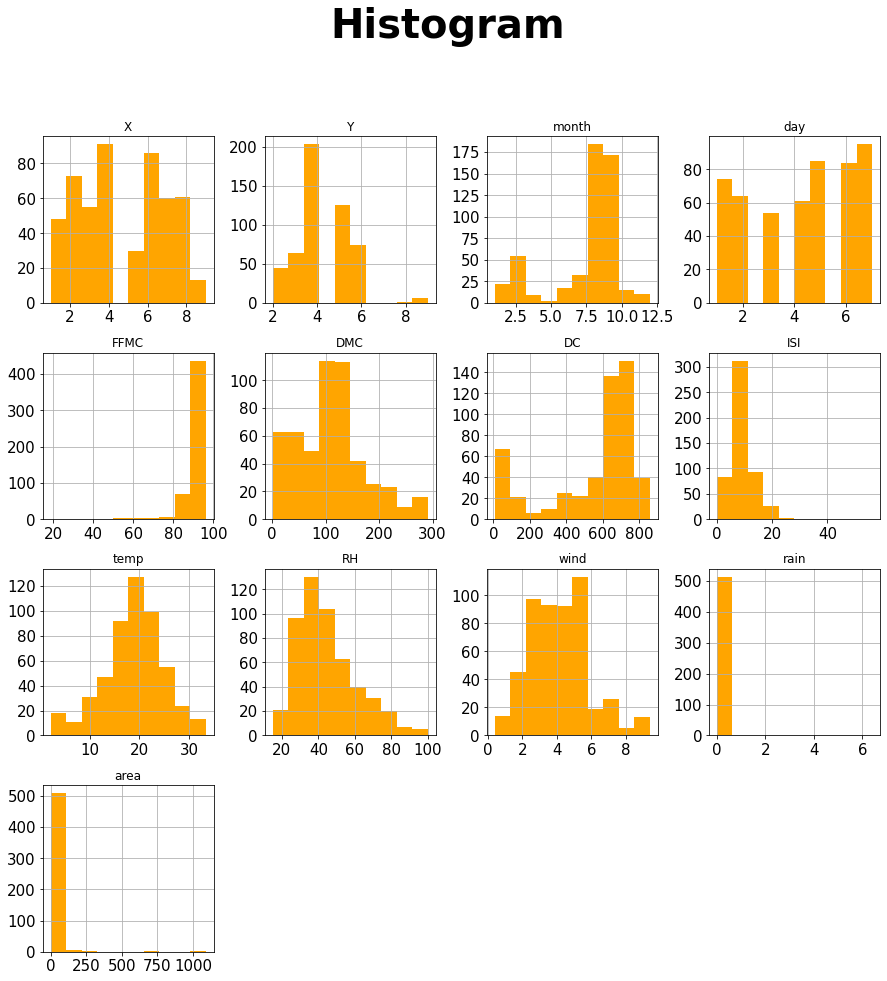

In [ ]:
df.hist(sharex=False, sharey=False, xlabelsize=15, ylabelsize=15, color='orange', figsize=(15,15))
plt.suptitle('Histogram', y=1, fontweight='bold', fontsize=40)
plt.show()

### Probability Density Function (PDF)

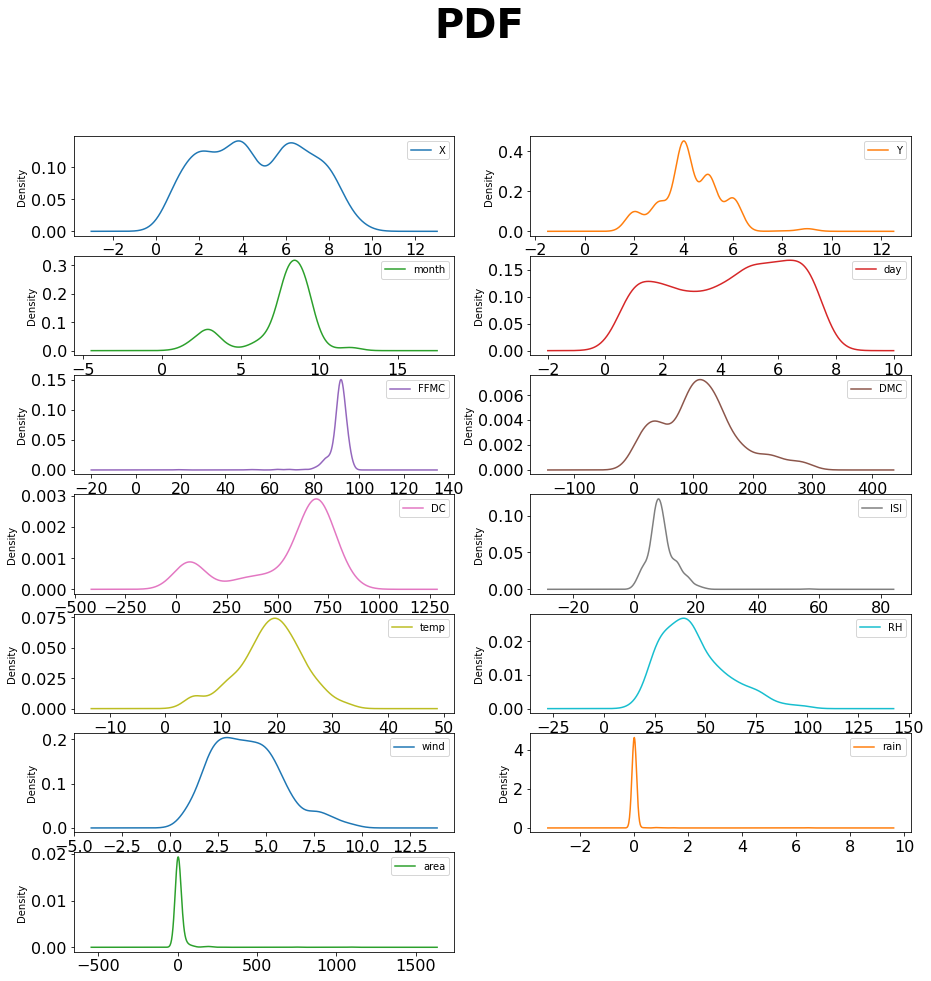

In [ ]:
df.plot(kind='density', subplots=True, layout=(7,2), sharex=False, fontsize=16, figsize=(15,15))
plt.suptitle('PDF', y=1, fontweight='bold', fontsize=40)
plt.show()

### Box & Whisker

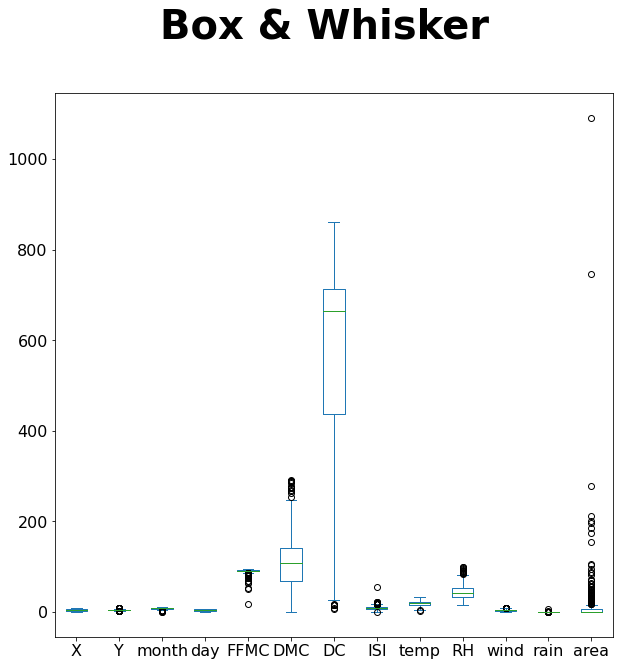

In [ ]:
df.plot(kind='box', subplots=False, layout=(4,4), sharex=False, sharey=False, fontsize=16, figsize=(10,10))
plt.suptitle('Box & Whisker', y=1, fontweight='bold', fontsize=40)
plt.show()

### Scatter Matrix

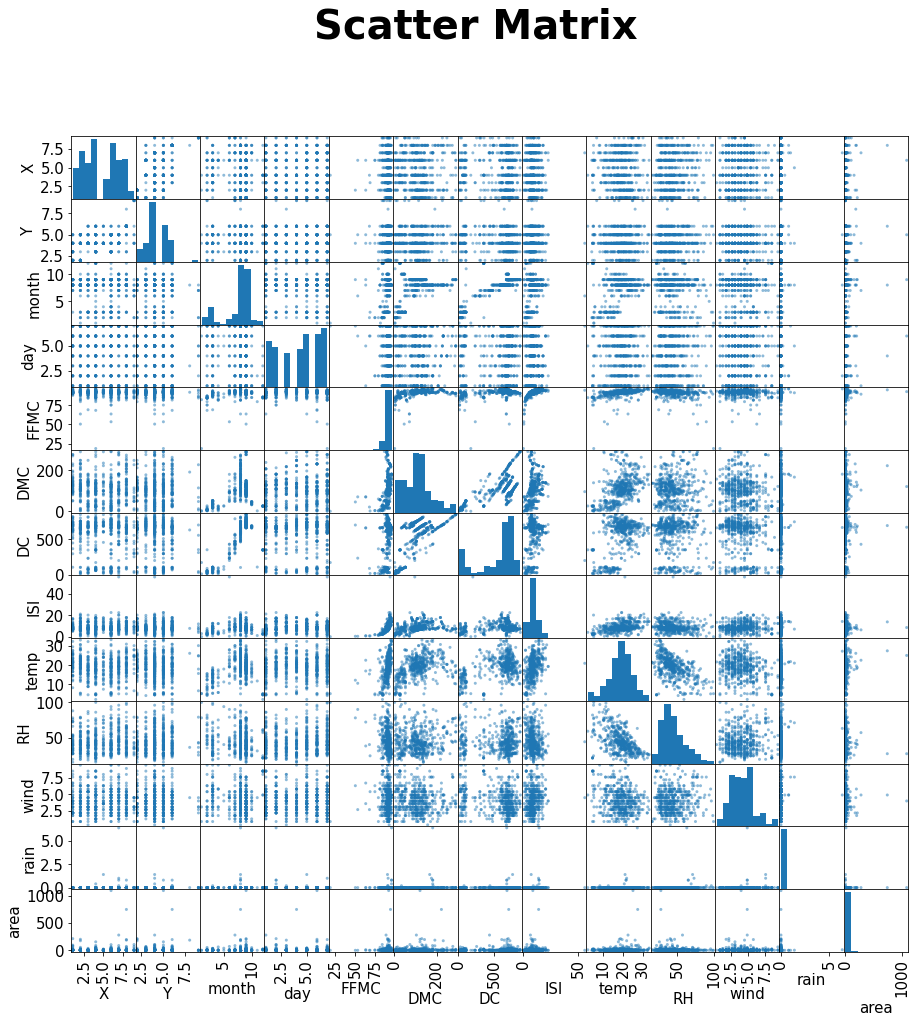

In [ ]:
from pandas.plotting._matplotlib import scatter_matrix
Axes = scatter_matrix(df, figsize=(15,15))
plt.suptitle('Scatter Matrix', y=1, fontweight='bold', fontsize=40)
plt.rcParams['axes.labelsize'] = 15
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
plt.show()

### Heatmap MAtrix

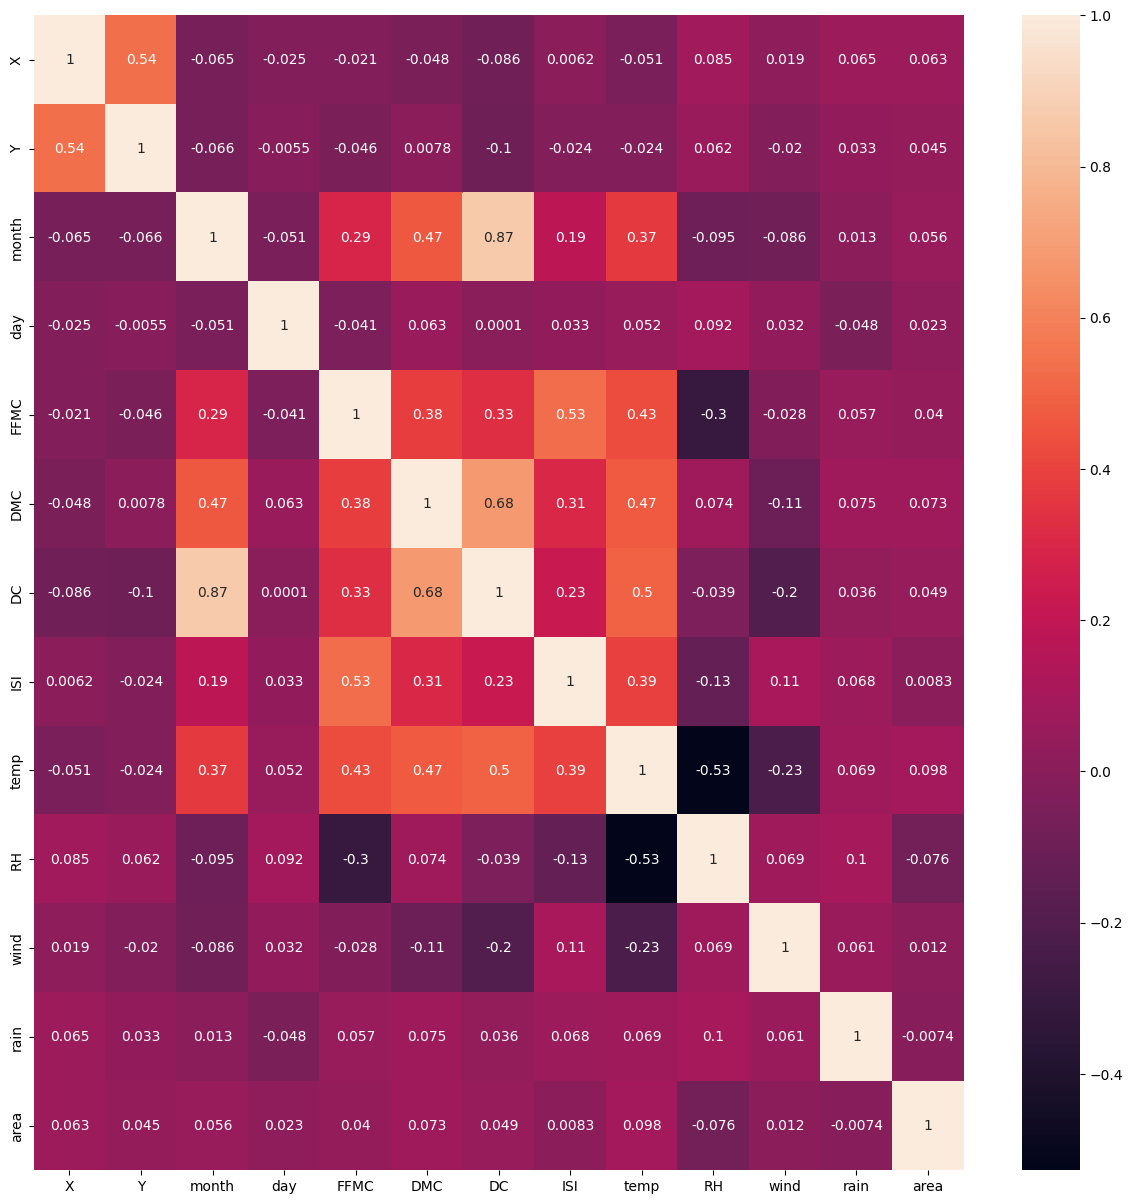

In [ ]:
plt.figure(figsize=(15, 15))
plt.style.use('default')
sns.heatmap(df.corr(), annot=True)

## Data Segregation 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Test & Train

In [ ]:
X, y = np.arange(10).reshape((5, 2)), range(5)

In [ ]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
list(y)

[0, 1, 2, 3, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('X_train')
print(X_train)
print('X_test')
print(X_test)
print('y_train')
print(y_train)
print('y_test')
print(y_test)

X_train
[[4 5]
 [0 1]
 [6 7]]
X_test
[[2 3]
 [8 9]]
y_train
[2, 0, 3]
y_test
[1, 4]


### KFold

In [ ]:
dataset = range(16)

In [ ]:
KFCrossValidator = KFold(n_splits=4, shuffle=False)
KFdataset = KFCrossValidator.split(dataset)

In [ ]:
print('{} {:^61} {}'.format('Round', 'Training set', 'Testing set'))
for iteration, data in enumerate(KFdataset, start=1):
  print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Round                         Training set                          Testing set
    1     [ 0  1  2  3  8  9 10 11 12 13 14 15]         [4 5 6 7]        
    2     [ 0  1  2  3  4  5  6  7 12 13 14 15]       [ 8  9 10 11]      
    3     [ 0  1  2  3  4  5  6  7  8  9 10 11]       [12 13 14 15]      


## Training the Model

In [ ]:
import warnings

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
array = df.values
x = array[:,0:12]
y = array[:,12]

In [90]:
max_error_scoring = 'max_error'
neg_mean_absolute_error_scoring = 'neg_mean_absolute_error'
r2_scoring = 'r2'
neg_mean_squared_error_scoring = 'neg_mean_squared_error'

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('Ridge', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [92]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True)
  cv_results = cross_val_score(model, x, y, cv=kfold, scoring=max_error_scoring)
  cv_results2 = cross_val_score(model, x, y, cv=kfold, scoring=neg_mean_absolute_error_scoring)
  cv_results3 = cross_val_score(model, x, y, cv=kfold, scoring=r2_scoring)
  cv_results4 = cross_val_score(model, x, y, cv=kfold, scoring=neg_mean_squared_error_scoring)
  msg = "%s: max error: %f , mean abs error: %f, r2: %f, mean sqr error: %f"%(name, cv_results.mean(), -cv_results2.mean(), cv_results3.mean(), -cv_results4.mean())
  print(msg)

LR: max error: -270.178284 , mean abs error: 20.110947, r2: -0.457102, mean sqr error: 4068.164009
LASSO: max error: -284.908405 , mean abs error: 19.392612, r2: -0.425034, mean sqr error: 4049.864562
EN: max error: -310.157869 , mean abs error: 19.568287, r2: -0.158532, mean sqr error: 4081.919341
Ridge: max error: -276.821314 , mean abs error: 20.074114, r2: -0.228457, mean sqr error: 4110.552464
KNN: max error: -301.483200 , mean abs error: 18.850158, r2: -1.611835, mean sqr error: 4796.826690
CART: max error: -422.428000 , mean abs error: 21.868208, r2: -30.421468, mean sqr error: 7853.235306
SVR: max error: -320.944200 , mean abs error: 12.844766, r2: -0.127336, mean sqr error: 4219.192975


In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [94]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [95]:
prediction = lasso_model.predict(X_test)
prediction


array([ 2.94995557, 10.31741163,  5.11331167,  8.82953603,  9.37472473,
        2.25890375, 16.70956165, 10.21372406, 12.71398315, 17.82743566,
       12.00661147, -0.13366089,  2.05100125,  9.61362391, 20.35978817,
        4.46999326, 11.4878202 ,  8.22013444, 22.99636305,  6.57213204,
       15.16990813,  2.06185639,  2.60841973, 20.26525161, 17.97317314,
       15.84725657, 11.22294233, 18.07415259, 19.27700019,  6.71476154,
       11.69520281,  7.95309194, 12.58956125,  7.84373939, 12.95490693,
        7.86654371, 10.29230298, 13.12601655,  7.55670958, 18.24618339,
       10.86374712,  0.84185952, 20.22670534,  8.67143132, 17.11750646,
        9.87835433, -0.41212642, 12.75284261,  7.16986389,  4.50527181,
       26.3280149 , 21.87386519, 20.89573415, 16.78773238, 21.87773448,
       16.31145194, 12.17760756, 21.10444723, 19.24150053, 13.21816328,
        8.7358127 ,  2.11532756, 23.43585742,  8.45085449, 13.32288157,
        1.14739124,  7.81763591, 13.16758569, 12.31864714,  7.13

## Deploying the Model

In [96]:
import pickle
pickle.dump(lasso_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

In [97]:
!pip install flask-ngrok

In [100]:
from flask import Flask, request
from flask_ngrok import run_with_ngrok
import requests

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/predict', methods=['POST'])
def home():
  X = int(request.args.get('X', '')) 
  Y = int(request.args.get('Y', '')) 
  month = int(request.args.get('month', '')) 
  day = int(request.args.get('day', '')) 
  FFMC = float(request.args.get('FFMC', '')) 
  DMC = float(request.args.get('DMC', '')) 
  DC = float(request.args.get('DC', '')) 
  ISI = float(request.args.get('ISI', '')) 
  temp = float(request.args.get('temp', '')) 
  RH = float(request.args.get('RH', '')) 
  wind = float(request.args.get('wind', '')) 
  rain = float(request.args.get('rain', '')) 
  prediction = lasso_model.predict([[X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain]])
  print()
  print(prediction)
  return 'Prediction is ' + str(prediction[0])

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://710e-34-125-255-108.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Feb/2022 10:09:57] "POST /predict?X=7&Y=5&month=3&day=5&FFMC=86.2&DMC=26.2&DC=94.3&ISI=5.1&temp=8.2&RH=51&wind=6.7&rain=0.0 HTTP/1.1" 200 -



[6.0085497]
